<a href="https://colab.research.google.com/github/hyunicecream/ML-DL/blob/main/CNN%20Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow.keras.layers import Input, Dense, Conv2D
from tensorflow.keras.layers import Dropout, MaxPooling2D, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
(d_train, y_train), (d_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


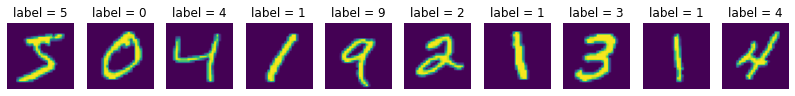

In [ ]:
# 손글씨 이미지를 몇개만 확인해 본다.
fig, ax = plt.subplots(1, 10, figsize=(14,4))
for i in range(10):
    ax[i].imshow(d_train[i])
    ax[i].axis('off')
    ax[i].set_title('label = ' + str(y_train[i]))
plt.show()

In [ ]:
# train 데이터를 표준화하고, Conv2D를 사용하기 위해 shape을 조정한다.
x_train = d_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = d_test.reshape(-1, 28, 28, 1).astype('float32') / 255
x_train.shape, y_train.shape

((60000, 28, 28, 1), (60000,))

In [ ]:
# CNN 모델을 생성한다.
x_input = Input(batch_shape=(None, 28, 28, 1))
conv = Conv2D(filters=20, kernel_size=(10, 8), activation='relu')(x_input)
pool = MaxPooling2D(pool_size=(8, 6), strides=1, padding='valid')(conv)
# strides = 1 = (1, 1)
# padding='same' : 원본 데이터와 크기가 동일하도록 해라
# valid: 패딩을 하지 않음(사이즈가 맞지 않을 경우 가장 우측의 열 혹은 가장 아래의 행을 드랍한다).
flat = Flatten()(pool)
h_layer = Dense(64, activation='relu')(flat)
h_layer = Dropout(0.5)(h_layer)
y_output = Dense(10, activation='softmax')(h_layer)

model = Model(x_input, y_output)
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001))
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 19, 21, 20)        1620      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 16, 20)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3840)              0         
                                                                 
 dense (Dense)               (None, 64)                245824    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                             

In [ ]:
# 학습
hist = model.fit(x_train, y_train,
                 validation_data = (x_test, y_test),
                 batch_size = 512, epochs = 30)

Epoch 1/30
118/118 [==============================] - 16s 31ms/step - loss: 1.0286 - val_loss: 0.1925
Epoch 2/30
118/118 [==============================] - 3s 25ms/step - loss: 0.4859 - val_loss: 0.1136
Epoch 3/30
118/118 [==============================] - 3s 23ms/step - loss: 0.3974 - val_loss: 0.0834
Epoch 4/30
118/118 [==============================] - 2s 18ms/step - loss: 0.3467 - val_loss: 0.0735
Epoch 5/30
118/118 [==============================] - 2s 14ms/step - loss: 0.3239 - val_loss: 0.0620
Epoch 6/30
118/118 [==============================] - 2s 14ms/step - loss: 0.3062 - val_loss: 0.0598
Epoch 7/30
118/118 [==============================] - 2s 14ms/step - loss: 0.2893 - val_loss: 0.0514
Epoch 8/30
118/118 [==============================] - 2s 14ms/step - loss: 0.2780 - val_loss: 0.0509
Epoch 9/30
118/118 [==============================] - 2s 14ms/step - loss: 0.2723 - val_loss: 0.0487
Epoch 10/30
118/118 [==============================] - 2s 14ms/step - loss: 0.2606 - val_l

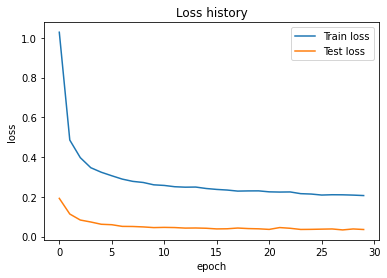

In [ ]:
# Loss history를 그린다
plt.plot(hist.history['loss'], label='Train loss')
plt.plot(hist.history['val_loss'], label = 'Test loss')
plt.legend()
plt.title("Loss history")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [ ]:
pred = model.predict(x_test)
y_pred = np.argmax(pred, axis=1)
acc = (y_test == y_pred).mean()
print("정확도 = ", acc)

정확도 =  0.9879


<function matplotlib.pyplot.show>

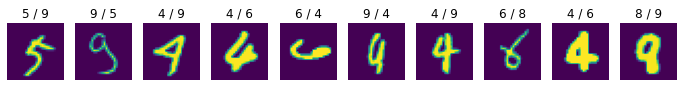

In [ ]:
# 잘못 분류한 이미지 몇개를 확인해 본다
n_sample = 10
miss_cls = np.where(y_test != y_pred)[0]
miss_sam = np.random.choice(miss_cls, n_sample)

fig, ax = plt.subplots(1, n_sample, figsize=(12, 4))
for i, miss in enumerate(miss_sam):
  ax[i].imshow(d_test[miss])
  ax[i].axis("off")
  ax[i].set_title(str(y_test[miss]) + ' / ' + str(y_pred[miss]))
plt.show

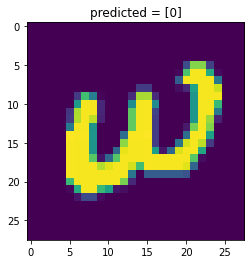

In [ ]:
# 옆으로 누운 이미지를 인식할 수 있을까? 학습시키지 않았기 때문에 당연히 인식할 수 없다.
img = d_train[7].T
y = model.predict(img.reshape(1, 28, 28, 1)).argmax(axis=1)
plt.imshow(img)
plt.title('predicted = ' + str(y))
plt.show()